In [1]:
import numpy as np 
import pandas as pd


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap="viridis")

<Axes: >

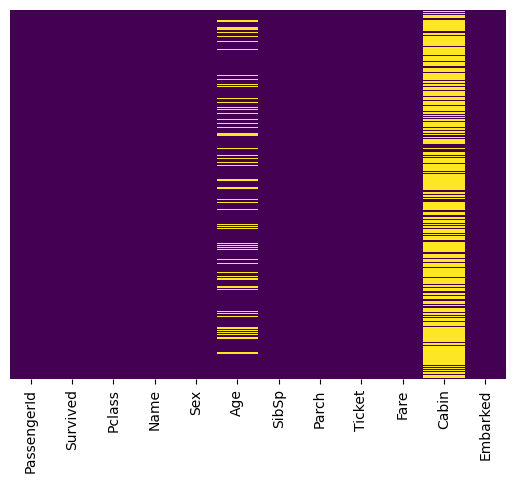

In [7]:
plt.show()

In [11]:
sns.set_style("whitegrid")

In [13]:
sns.countplot(x="Survived", hue="Sex", data = train, palette="RdBu_r")

<Axes: xlabel='Survived', ylabel='count'>

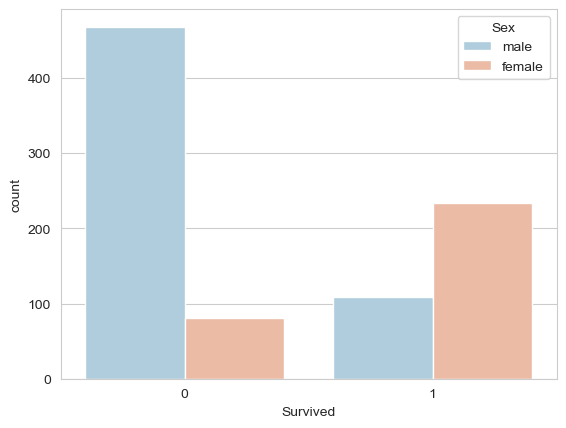

In [120]:
plt.show()

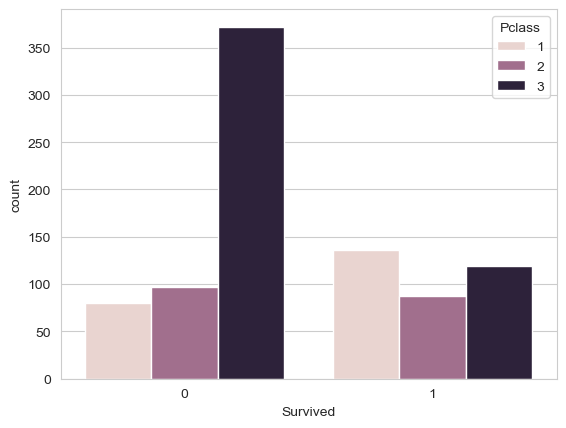

In [122]:
sns.countplot(x="Survived", hue="Pclass", data = train)
plt.show()

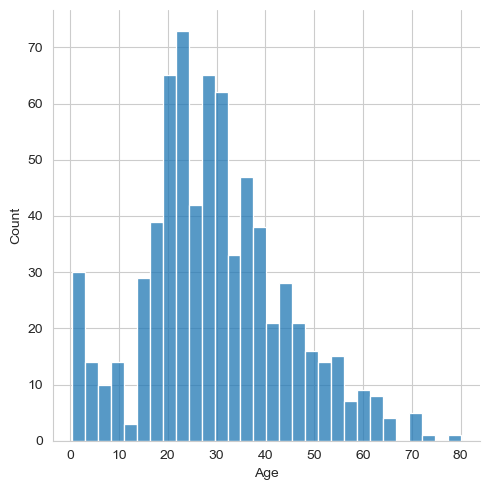

In [124]:
sns.displot(train["Age"].dropna(), kde=False, bins=30)
plt.show()

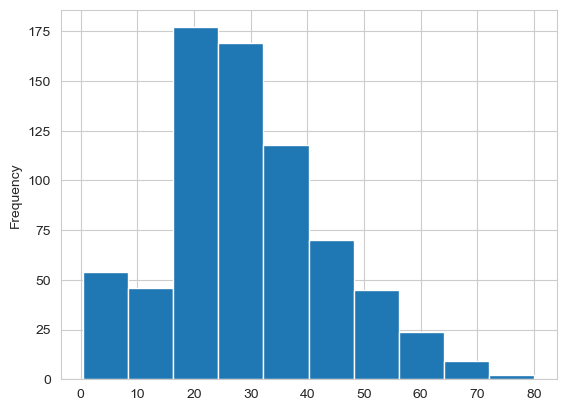

In [126]:
train["Age"].plot.hist()
plt.show()

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


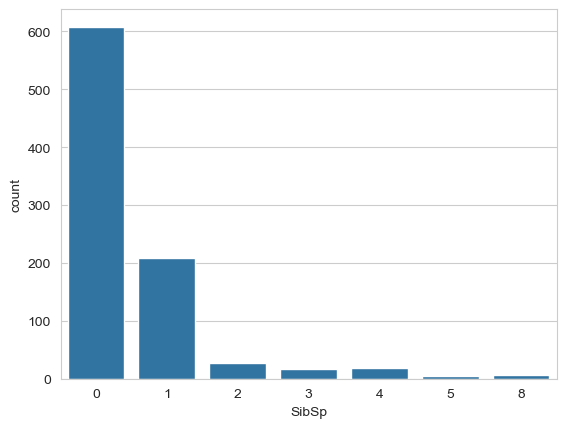

In [130]:
sns.countplot(x = "SibSp", data= train)
plt.show()

In [132]:
train["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

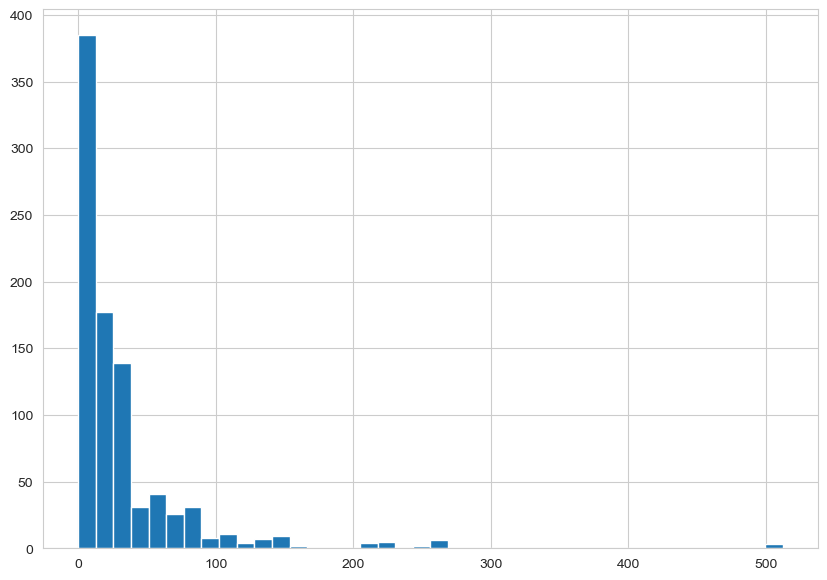

In [134]:
train["Fare"].hist(bins=40, figsize=(10,7))
plt.show()

In [136]:
import cufflinks as cf

In [138]:
cf.go_offline()

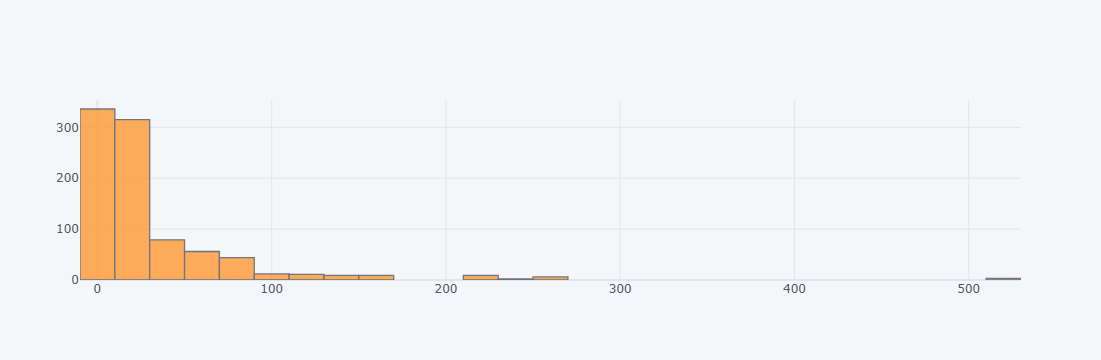

In [140]:
train["Fare"].iplot(kind="hist", bins=30)

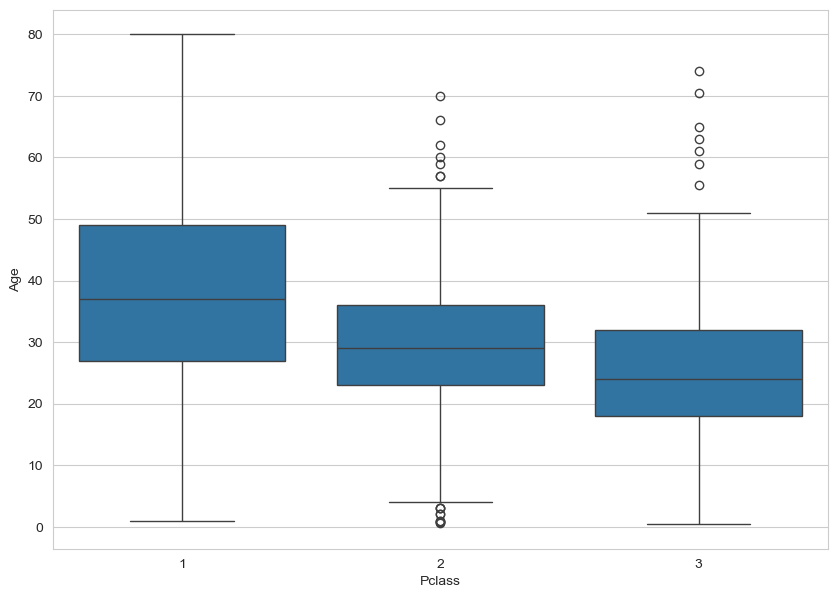

In [142]:
plt.figure(figsize=(10,7))
sns.boxplot(x="Pclass", y = "Age", data= train)
plt.show()

In [144]:
def impute_age(row):
    if pd.isnull(row["Age"]):
        if row["Pclass"] == 1:
            return 37  # Average age for Pclass 1
        elif row["Pclass"] == 2:
            return 29  # Average age for Pclass 2
        else:
            return 24  # Average age for Pclass 3
    else:
        return row["Age"]


In [146]:
train["Age"] = train[["Age", "Pclass"]].apply(impute_age, axis=1)

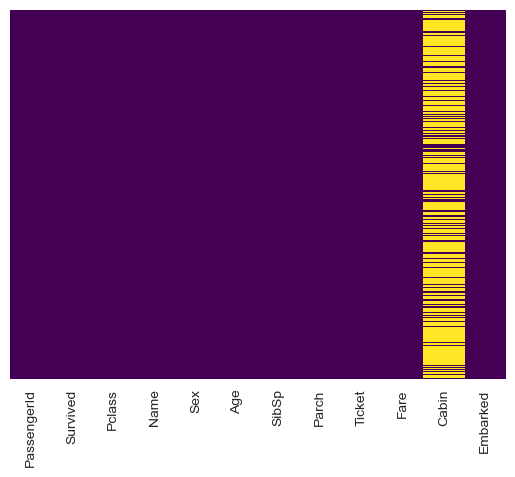

In [148]:
sns.heatmap(train.isnull(), yticklabels=False, cbar = False, cmap="viridis")
plt.show()

In [150]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
train.dropna(inplace = True)

In [154]:
sex = pd.get_dummies(train["Sex"], drop_first = True)
                     

In [156]:
sex.head()

,male
1,False
3,False
6,True
10,False
11,False


In [158]:
embark = pd.get_dummies(train["Embarked"], drop_first = True)
embark.head()

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True


In [60]:
train = pd.concat([train,sex,embark], axis = 1)
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False,False,True


In [160]:
train.drop("Cabin", axis = 1, inplace = True)

In [162]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S


In [164]:
train.drop(["Sex", "Embarked", "Name", "Ticket"], axis=1, inplace= True)

In [166]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833
3,4,1,1,35.0,1,0,53.1000
6,7,0,1,54.0,0,0,51.8625
10,11,1,3,4.0,1,1,16.7000
11,12,1,1,58.0,0,0,26.5500


In [168]:
train.drop("PassengerId", axis = 1, inplace =True)

In [170]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625
10,1,3,4.0,1,1,16.7000
11,1,1,58.0,0,0,26.5500


In [192]:
X = train.drop("Survived", axis = 1)
y = train["Survived"]

In [180]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [196]:
from sklearn.linear_model import LogisticRegression

In [198]:
logmodel = LogisticRegression()

In [200]:
logmodel.fit(X_train, y_train)

LogisticRegression()

In [202]:
predictions = logmodel.predict(X_test)

In [204]:
from sklearn.metrics import classification_report

In [206]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.30      0.41        20
           1       0.73      0.93      0.82        41

    accuracy                           0.72        61
   macro avg       0.70      0.61      0.62        61
weighted avg       0.71      0.72      0.68        61



In [208]:
from sklearn.metrics import confusion_matrix

In [210]:
confusion_matrix(y_test, predictions)

array([[ 6, 14],
       [ 3, 38]], dtype=int64)